Test

In [1]:

import pandas as pd             # manipulation de données tabulaires
import sys
import os
import json                     # pour afficher proprement le JSON si besoin
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))


In [48]:
history_elo = pd.read_parquet("../data/processed/elos_history.parquet")


In [60]:
history_elo.columns

Index(['season', 'matchday', 'team', 'elo_before'], dtype='object')

In [56]:
history_elo_23=history_elo[history_elo.season=="2023-08-11"]
history_elo_24=history_elo[history_elo.season=="2024-08-18"]
history_elo_25=history_elo[history_elo.season=="2025-08-17"]

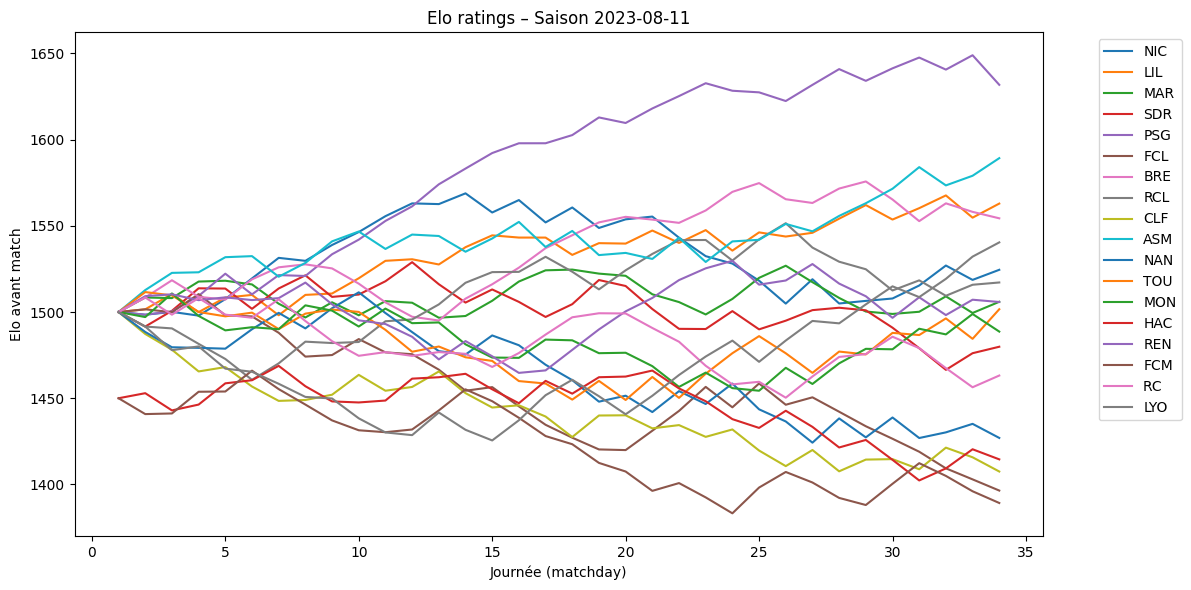

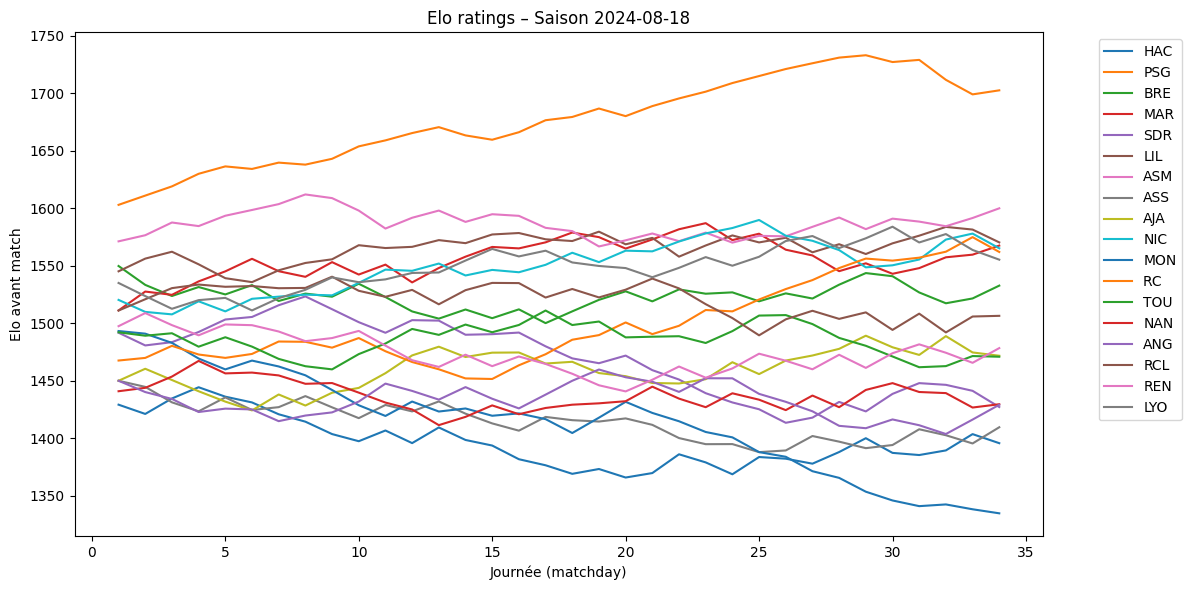

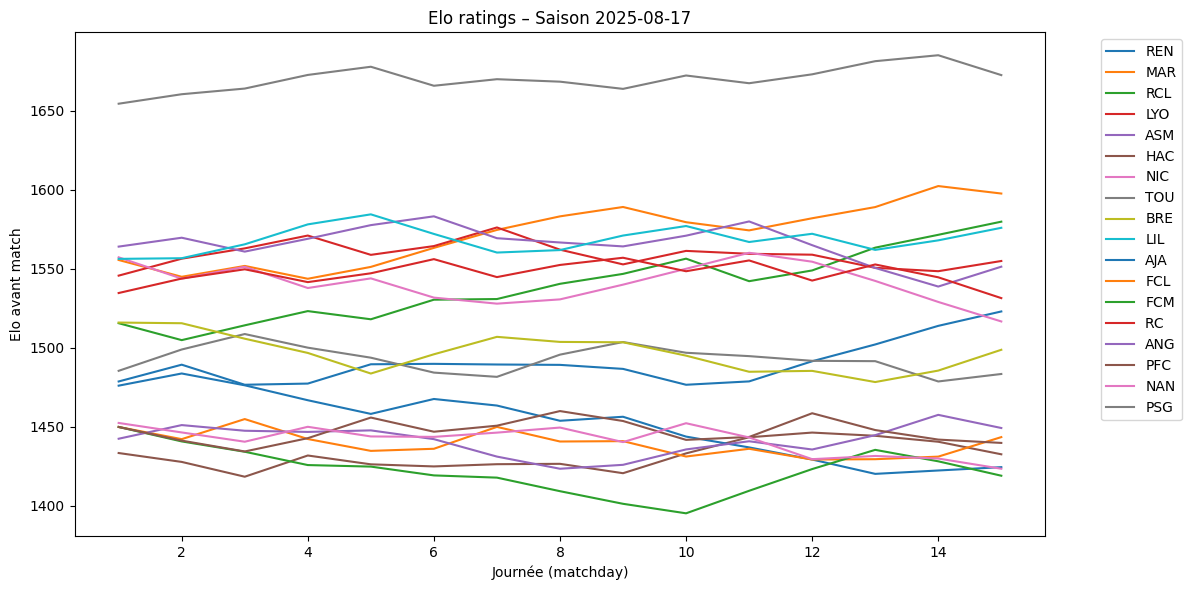

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

teams = history_elo_23["team"].unique()

for team in teams:
    sub = history_elo_23[history_elo_23["team"] == team]
    plt.plot(sub["matchday"], sub["elo_before"], label=team)

plt.xlabel("Journée (matchday)")
plt.ylabel("Elo avant match")
plt.title(f"Elo ratings – Saison {history_elo_23['season'].iloc[0]}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))

teams = history_elo_24["team"].unique()

for team in teams:
    sub = history_elo_24[history_elo_24["team"] == team]
    plt.plot(sub["matchday"], sub["elo_before"], label=team)

plt.xlabel("Journée (matchday)")
plt.ylabel("Elo avant match")
plt.title(f"Elo ratings – Saison {history_elo_24['season'].iloc[0]}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

teams = history_elo_25["team"].unique()

for team in teams:
    sub = history_elo_25[history_elo_25["team"] == team]
    plt.plot(sub["matchday"], sub["elo_before"], label=team)

plt.xlabel("Journée (matchday)")
plt.ylabel("Elo avant match")
plt.title(f"Elo ratings – Saison {history_elo_25['season'].iloc[0]}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [2]:
from src.etl import load_raw_matches, find_next_opponent,fetch_matches,save_raw_matches

In [ ]:
#matches_json=fetch_matches(2015,2025)
#save_raw_matches(matches_json,"../data/raw")

'../data/raw\\FL1_2025.json'

In [3]:
matches_json = load_raw_matches("../data/raw/",season_id=2025)
matches_2024= load_raw_matches("../data/raw/",season_id=2024)
matches_2023= load_raw_matches("../data/raw/",season_id=2023)

In [16]:
matches_list = matches_json["matches"]
df_matches = pd.json_normalize(matches_list)

matches_list_24 = matches_2024["matches"]
df_matches_24 = pd.json_normalize(matches_list_24)

matches_list_23 = matches_2023["matches"]
df_matches_23 = pd.json_normalize(matches_list_23)

In [17]:
df_matches_23=df_matches_23[df_matches_23["status"]=="FINISHED"]



In [41]:
print(df_matches["homeTeam.tla"].unique())
df_matches["homeTeam.name"].unique()

['REN' 'RCL' 'ASM' 'NIC' 'BRE' 'AJA' 'FCM' 'ANG' 'NAN' 'PSG' 'MAR' 'LYO'
 'FCL' 'HAC' 'TOU' 'RC ' 'LIL' 'PFC']


array(['Stade Rennais FC 1901', 'Racing Club de Lens', 'AS Monaco FC',
       'OGC Nice', 'Stade Brestois 29', 'AJ Auxerre', 'FC Metz',
       'Angers SCO', 'FC Nantes', 'Paris Saint-Germain FC',
       'Olympique de Marseille', 'Olympique Lyonnais', 'FC Lorient',
       'Le Havre AC', 'Toulouse FC', 'RC Strasbourg Alsace', 'Lille OSC',
       'Paris FC'], dtype=object)

In [43]:

df_matches.utcDate

0      2025-08-15T18:45:00Z
1      2025-08-16T15:00:00Z
2      2025-08-16T17:00:00Z
3      2025-08-16T19:05:00Z
4      2025-08-17T13:00:00Z
               ...         
301    2026-05-16T00:00:00Z
302    2026-05-16T00:00:00Z
303    2026-05-16T00:00:00Z
304    2026-05-16T00:00:00Z
305    2026-05-16T00:00:00Z
Name: utcDate, Length: 306, dtype: object

In [18]:

df_matches_tot = pd.concat([df_matches, df_matches_24,df_matches_23], ignore_index=True)
df_matches_tot.shape

(918, 39)

In [20]:
df_matches_tot["score.winner"].value_counts()/df_matches_tot.shape[0]

score.winner
HOME_TEAM    0.361656
AWAY_TEAM    0.263617
DRAW         0.188453
Name: count, dtype: float64

In [4]:
find_next_opponent(matches_json,"Stade Rennais FC 1901")

'FC Metz'

In [2]:
df = pd.read_parquet("../data/processed/standings_long.parquet")

df.head()

,matchday,team,points,points_cum,gf_cum,ga_cum,gdif_cum,wins_cum,draws_cum,losses_cum,rank
0,1,AS Monaco FC,3,3,3.0,1.0,2.0,1,0,0,1
1,1,AJ Auxerre,3,3,1.0,0.0,1.0,1,0,0,2
2,1,Angers SCO,3,3,1.0,0.0,1.0,1,0,0,3
3,1,Olympique Lyonnais,3,3,1.0,0.0,1.0,1,0,0,4
4,1,Paris Saint-Germain FC,3,3,1.0,0.0,1.0,1,0,0,5


In [7]:
from viz import compare_gdif, compare_ga, compare_gf, compare_points_total, compare_rank, compare_resultats

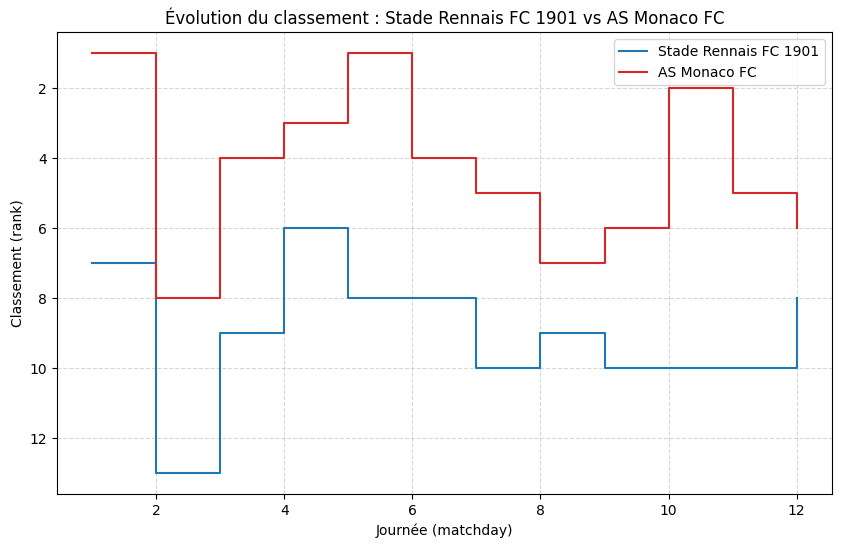

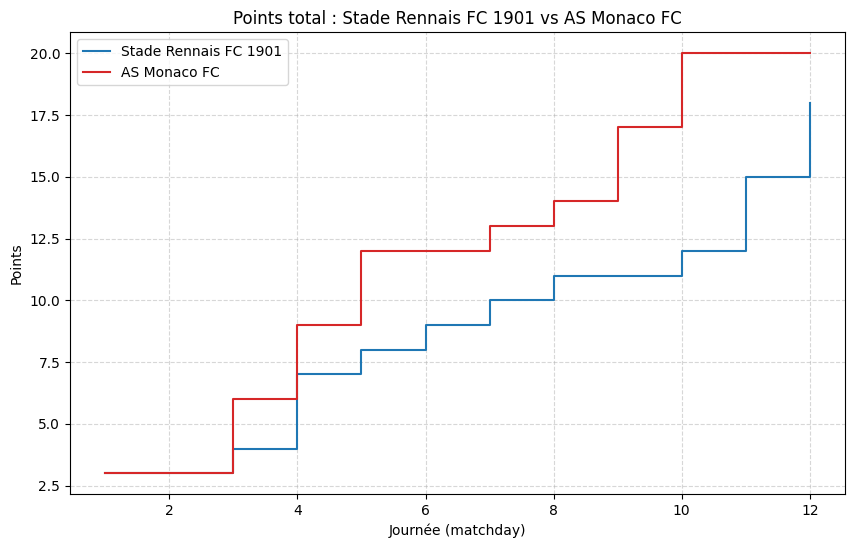

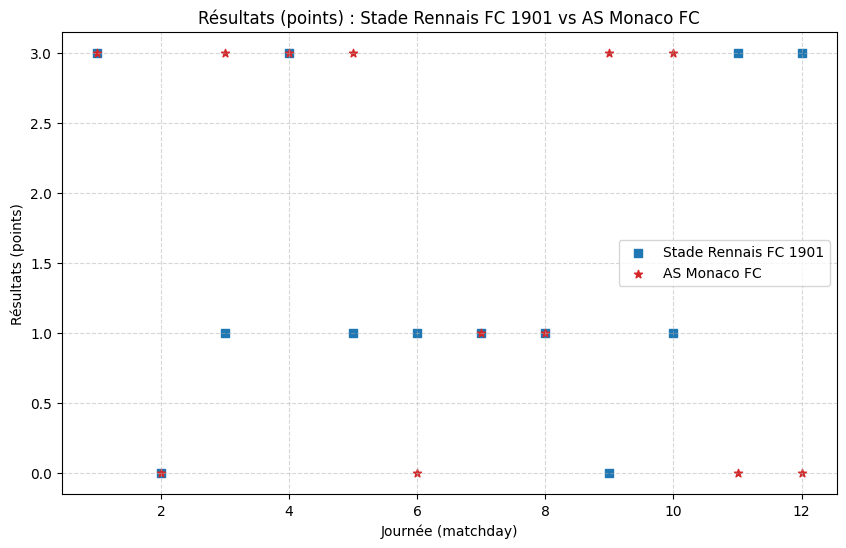

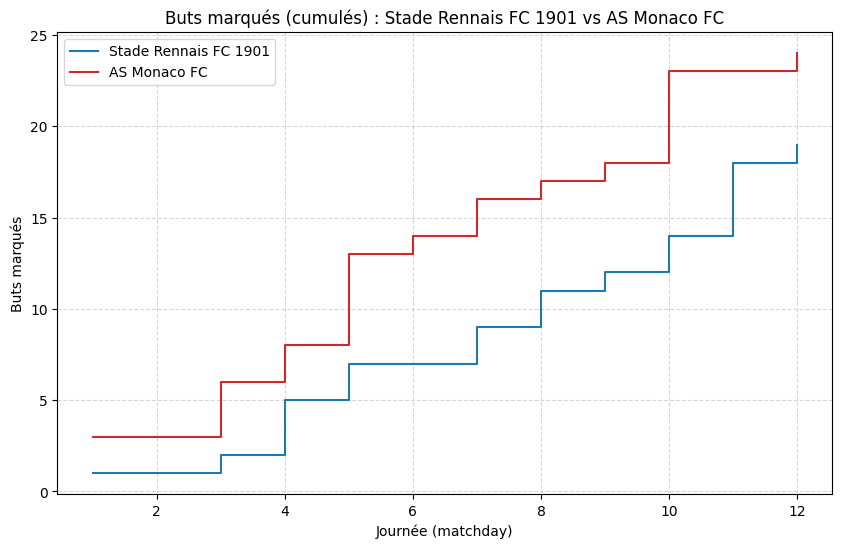

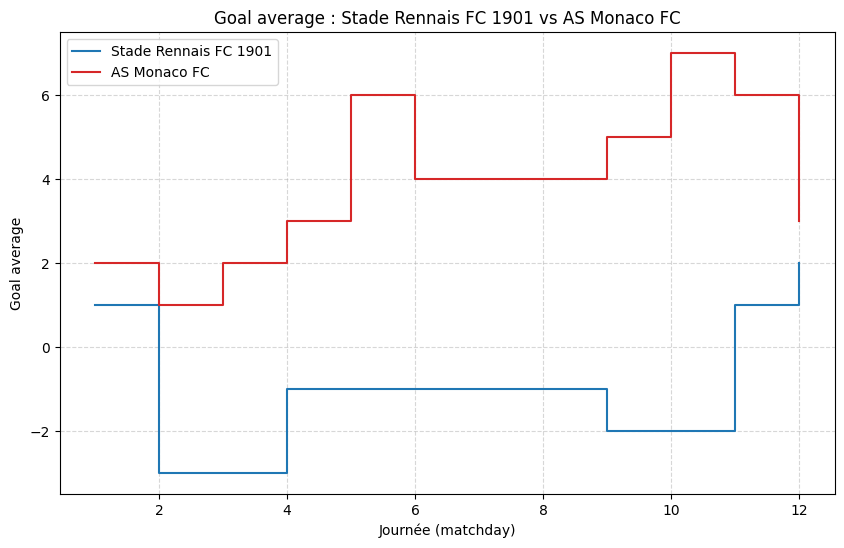

In [8]:
compare_rank(df,'Stade Rennais FC 1901','AS Monaco FC')
compare_points_total(df,'Stade Rennais FC 1901','AS Monaco FC')
compare_resultats(df,'Stade Rennais FC 1901','AS Monaco FC')
compare_gf(df,'Stade Rennais FC 1901','AS Monaco FC')
compare_gdif(df,'Stade Rennais FC 1901','AS Monaco FC')